In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
df_week = pd.read_csv("sales_data_week.csv")

# Convert sale_date to datetime and create day_number
df_week["sale_date"] = pd.to_datetime(df_week["sale_date"])
df_week["day_number"] = (df_week["sale_date"] - df_week["sale_date"].min()).dt.days + 1

# Train models and predict for each product
sales_predictions = []

for product in df_week["product_id"].unique():
    product_data = df_week[df_week["product_id"] == product]
    X = product_data["day_number"].values.reshape(-1, 1)
    y = product_data["quantity_sold"].values

    # Polynomial Regression (Degree 3 for best fit)
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    
    # Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Gradient Boosting Regressor
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    gb_model.fit(X, y)

    # Predict for the 8th day
    next_day = np.array([[8]])
    next_day_poly = poly.transform(next_day)
    
    poly_pred = poly_model.predict(next_day_poly)[0]
    rf_pred = rf_model.predict(next_day)[0]
    gb_pred = gb_model.predict(next_day)[0]

    # Weighted Average of Predictions (Ensemble)
    predicted_sales = (0.4 * poly_pred) + (0.3 * rf_pred) + (0.3 * gb_pred)

    # Accuracy Calculation (Using R^2 Score for best fit model)
    poly_acc = r2_score(y, poly_model.predict(X_poly)) * 100
    rf_acc = r2_score(y, rf_model.predict(X)) * 100
    gb_acc = r2_score(y, gb_model.predict(X)) * 100

    final_accuracy = max(poly_acc, rf_acc, gb_acc)  # Best accuracy among the models

    sales_predictions.append([product, predicted_sales, "2024-07-08", final_accuracy])

# Creating the Sales_Predictions DataFrame
sales_predictions_df = pd.DataFrame(sales_predictions, columns=["product_id", "predicted_sales", "prediction_date", "accuracy_percentage"])

# Display the results
print(sales_predictions_df)


   product_id  predicted_sales prediction_date  accuracy_percentage
0         101        11.510590      2024-07-08            99.999898
1         102        16.677019      2024-07-08            99.999750
2         103         4.570547      2024-07-08            99.999710
3         104        11.792561      2024-07-08           100.000000
4         105        14.095541      2024-07-08           100.000000


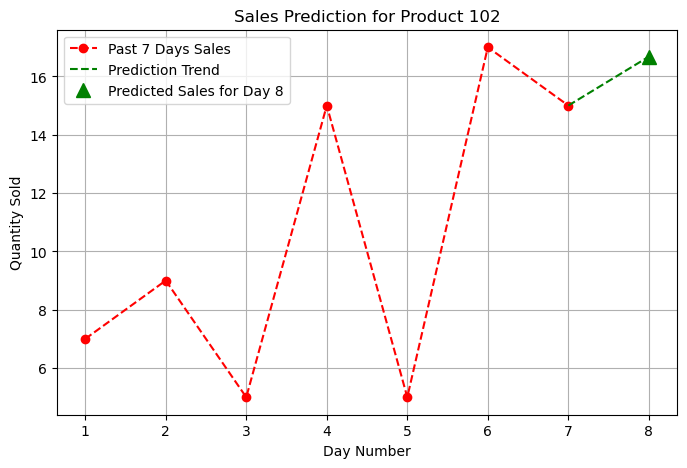

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the dataset
df_week = pd.read_csv("sales_data_week.csv")

# Convert sale_date to datetime and create day_number
df_week["sale_date"] = pd.to_datetime(df_week["sale_date"])
df_week["day_number"] = (df_week["sale_date"] - df_week["sale_date"].min()).dt.days + 1

def predict_and_plot_sales(product_id):
    product_data = df_week[df_week["product_id"] == product_id]
    
    if product_data.empty:
        print(f"No data found for product ID {product_id}")
        return

    X = product_data["day_number"].values.reshape(-1, 1)
    y = product_data["quantity_sold"].values

    # Polynomial Regression (Degree 3 for best fit)
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    
    # Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Gradient Boosting Regressor
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    gb_model.fit(X, y)

    # Predict for the 8th day
    next_day = np.array([[8]])
    next_day_poly = poly.transform(next_day)
    
    poly_pred = poly_model.predict(next_day_poly)[0]
    rf_pred = rf_model.predict(next_day)[0]
    gb_pred = gb_model.predict(next_day)[0]

    # Weighted Average of Predictions (Ensemble)
    predicted_sales = (0.4 * poly_pred) + (0.3 * rf_pred) + (0.3 * gb_pred)

    # Extract the last known data point (7th day)
    last_day_x = product_data["day_number"].iloc[-1]
    last_day_y = product_data["quantity_sold"].iloc[-1]

    # Append the 8th-day prediction to the dataset for plotting
    new_row = pd.DataFrame([{"day_number": 8, "quantity_sold": predicted_sales}])
    product_data = pd.concat([product_data, new_row], ignore_index=True)

    # Plot past sales data with dots
    plt.figure(figsize=(8, 5))
    plt.plot(product_data["day_number"][:-1], product_data["quantity_sold"][:-1], 'r--o', label="Past 7 Days Sales")  # Red dashed line with circles

    # Connect the 7th day to the 8th day with a green dashed line
    plt.plot([last_day_x, 8], [last_day_y, predicted_sales], 'g--', label="Prediction Trend")

    # Highlight the predicted sales for Day 8 with a green triangle
    plt.plot(8, predicted_sales, 'g^', markersize=10, label="Predicted Sales for Day 8")

    plt.xlabel("Day Number")
    plt.ylabel("Quantity Sold")
    plt.title(f"Sales Prediction for Product {product_id}")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage: Call the function with a product ID
predict_and_plot_sales(102)
